<a href="https://colab.research.google.com/github/YoshifumiMiyagi/PECARN-Group1-/blob/main/PECARN_Group_1_clustering_vol_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SEED = 42
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# CSVファイルを読み込む
df = pd.read_csv('/content/TBI PUD 10-08-2013.csv')
# 使用された説明変数とCTスキャンの必要性を示す目的変数をリストにする

variables_of_interest = [
#    'AgeTwoPlus',         # 年齢
    'High_impact_InjSev', # 外傷の重症度
    'LOCSeparate',        # 意識喪失の履歴
    'LocLen',             # 意識喪失の持続時間
#    'HA_verb',            # 頭痛の有無
#    'HASeverity',         # 頭痛の重症度
    'Vomit',              # 嘔吐の履歴
    'VomitNbr',           # 嘔吐の回数
    'ActNorm',            # 保護者の観察
#    'GCSTotal',           # GCSスコア
    'AMS',                # 精神状態の変化
    'SFxBas',             # 基底頭蓋骨骨折の兆候
    'SFxPalp',            # 触知可能な頭蓋骨骨折
    'Hema',               # 頭皮血腫
    'HemaLoc',            # 頭皮血腫の位置
#    'HospHeadPosCT',      # 目的変数（CTスキャンと2日以上の入院の必要性）
#    'PosCT'               # 目的変数（CTスキャンの必要性）
]

variables_of_numeric = [
    'GCSTotal',           # GCSスコア
    'AgeInMonth',         # 月齢
    'AgeinYears',         # 年
]
# 説明変数を抽出
df_selected = df[variables_of_interest]

In [ ]:
Dat = df_selected.copy()
#Dat["AgeTwoPlus"] = Dat["AgeTwoPlus"].replace({1: 0, 2: 1})
Dat['High_impact_InjSev'] = Dat['High_impact_InjSev'].replace({1: 0, 2: 1, 3:2})
Dat['LocLen'] = Dat['LocLen'].replace({92: np.nan, 1:0, 2: 1, 3: 2, 4: 3})
#Dat['HA_verb'] = Dat['HA_verb'].replace({91: np.nan})
#Dat['HASeverity'] = Dat['HASeverity'].replace({92: np.nan, 1:0, 2: 1, 3:2})
Dat['VomitNbr'] = Dat['VomitNbr'].replace({92:np.nan, 1: 0, 2: 1, 3: 2})
Dat['HemaLoc'] = Dat['HemaLoc'].replace({92:np.nan, 1: 0, 2: 1, 3: 2})

# 対象を頭皮血種と嘔吐と意識消失をみとめている頭部外傷児(252例）に限定する

In [ ]:
df2 = Dat[(Dat['LOCSeparate']==1)&(Dat['Vomit']==1)&(Dat['Hema']==1)]

In [ ]:
df2

,High_impact_InjSev,LOCSeparate,LocLen,Vomit,VomitNbr,ActNorm,AMS,SFxBas,SFxPalp,Hema,HemaLoc
83,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
148,0.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0
815,2.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0
911,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0
1062,1.0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42908,1.0,1.0,NaN,1.0,0.0,NaN,1.0,0.0,2.0,1.0,1.0
43067,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0
43147,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0
43197,0.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df2.shape

(252, 11)

In [ ]:
from sklearn.impute import KNNImputer

dat = df2.copy()
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(np.round(imputer.fit_transform(dat)))
df2.columns = dat.columns

In [ ]:
# 数が3以上のカテゴリカル変数のリスト
categorical_variables = [
    'High_impact_InjSev',
    'LOCSeparate',
    'LocLen',
    # 'HA_verb',
    #'HASeverity',
    'VomitNbr',
    'SFxPalp',
    'HemaLoc',
#    'PosCT'
]

In [ ]:
for col in df2.columns:
  if col not in categorical_variables:
     df2[col] = df2[col].astype(bool)

In [ ]:
df_selected_onehot = pd.get_dummies(df2, columns = categorical_variables)
df_selected_onehot

,Vomit,ActNorm,AMS,SFxBas,Hema,High_impact_InjSev_0.0,High_impact_InjSev_1.0,High_impact_InjSev_2.0,LOCSeparate_1.0,LocLen_0.0,...,LocLen_3.0,VomitNbr_0.0,VomitNbr_1.0,VomitNbr_2.0,SFxPalp_0.0,SFxPalp_1.0,SFxPalp_2.0,HemaLoc_0.0,HemaLoc_1.0,HemaLoc_2.0
0,True,False,True,False,True,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
1,True,False,True,False,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
2,True,False,True,True,True,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
3,True,False,True,False,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,True
4,True,True,False,False,True,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,True,False,True,False,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,True,False
248,True,True,False,False,True,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,True
249,True,True,True,False,True,False,True,False,True,True,...,False,True,False,False,True,False,False,False,False,True
250,True,False,True,False,True,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
k = 2

categorical_data = df_selected_onehot

kmodes = KModes(n_clusters=k, init='Huang', n_init=3, verbose=1,random_state=SEED)
#kmodes = KModes(n_clusters=k, init='Cao', n_init=5, verbose=1,random_state=SEED)
clusters = kmodes.fit_predict(categorical_data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data).toarray()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 52, cost: 978.0
Run 1, iteration: 2/100, moves: 60, cost: 978.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 61, cost: 984.0
Run 2, iteration: 2/100, moves: 12, cost: 984.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 75, cost: 1078.0
Run 3, iteration: 2/100, moves: 43, cost: 1046.0
Run 3, iteration: 3/100, moves: 48, cost: 992.0
Run 3, iteration: 4/100, moves: 16, cost: 992.0
Best run was number 1


In [ ]:
pca = PCA(n_components=k,random_state=SEED)
reduced_data = pca.fit_transform(encoded_data)

pca_explained_variance = pca.explained_variance_ratio_
print("PCA Explained Variance:", pca_explained_variance)

PCA Explained Variance: [0.19442072 0.13375293]


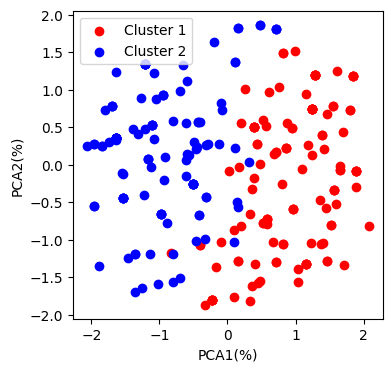

In [ ]:
plt.figure(figsize=(4, 4))
colors = ['r', 'b','g','pink','orange','yellow']
for cluster in range(k):
    points = reduced_data[clusters == cluster]
    plt.scatter(points[:, 0], points[:, 1], c=colors[cluster], label=f'Cluster {cluster+1}')

plt.xlabel('PCA1(%)')
plt.ylabel('PCA2(%)')
plt.legend()
#plt.savefig('Figure1.png',format="png", dpi=600)
plt.show()

In [ ]:
df3 = df2.copy()
df3['cluster'] = clusters
df3['GCSTotal'] = df['GCSTotal']
df3['AgeInMonth'] = df['AgeInMonth']
df3['AgeinYears'] = df['AgeinYears']

df2.shape, df3.shape

((252, 11), (252, 15))

In [ ]:
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

Cluster 0: n = 128
Cluster 1: n = 124


In [ ]:
from matplotlib.colors import ListedColormap

# 定性カラーマップの作成
CMAP2 = ListedColormap(['pink', 'red'])
CMAP3 = ListedColormap(['pink', 'orange', 'red'])
CMAP4 = ListedColormap(['pink', 'orange', 'red','purple'])

In [ ]:
cols2 = [
    #'HA_verb',
    'ActNorm','AMS','SFxBas','SFxPalp']
cols3 = ['High_impact_InjSev', 'HASeverity','VomitNbr','HemaLoc']
cols4 = ['LocLen']


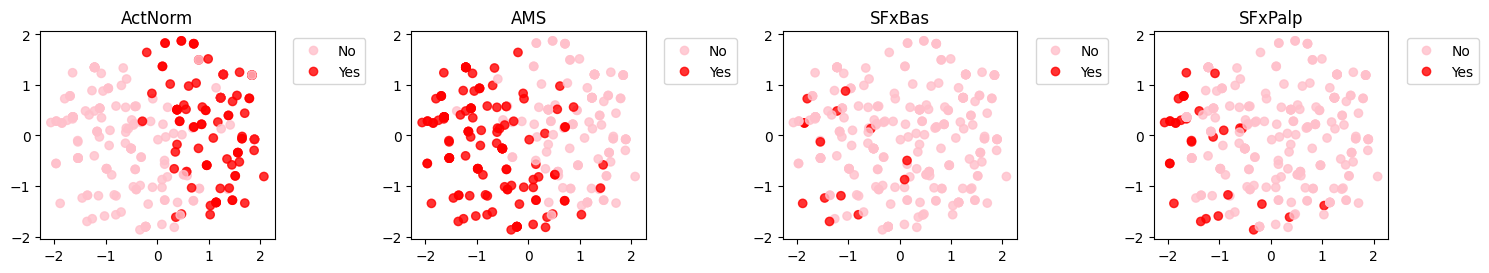

In [ ]:
embedding = reduced_data

fig = plt.figure(figsize=(15,10))
for i, col in enumerate(cols2):
    ax = fig.add_subplot(4, 4, i+1, title=col)

    dat[col] = dat[col].fillna(0)
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
        c=dat[col], cmap=CMAP2, alpha=0.8)

    handles, labels = scatter.legend_elements()
    plt.legend(handles=handles,
                labels=['No', 'Yes'],

                bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.show()

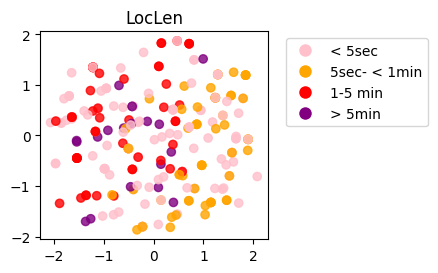

In [ ]:
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(cols4):
    ax = fig.add_subplot(4, 4, i+1, title=col)

    dat[col] = dat[col].fillna(0)
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
        c=dat[col], cmap=CMAP4, alpha=0.8)

        # 凡例を手動で設定
    legend_labels = ['< 5sec', '5sec- < 1min', '1-5 min', '> 5min']
    colors = ['pink', 'orange', 'red','purple']  # 各カテゴリの色を明示的に指定

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colors]

    plt.legend(handles=handles,
                labels=legend_labels,
                #title="LocLen",
                bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.show()

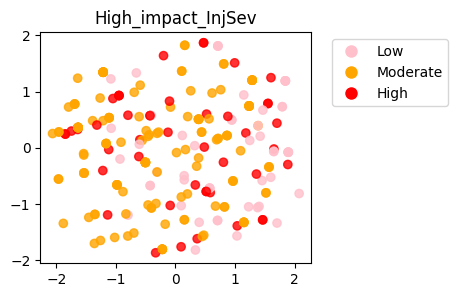

In [ ]:
# High_impact_InjSevのplot
plt.figure(figsize=(3.5, 3))
dat['High_impact_InjSev'] = dat['High_impact_InjSev'].fillna(0)
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
              c=dat['High_impact_InjSev'], cmap=CMAP3, alpha=0.8)
    # 凡例を手動で設定
legend_labels = ['Low', 'Moderate', 'High']
colors = ['pink', 'orange', 'red']  # 各カテゴリの色を明示的に指定

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colors]
plt.legend(handles=handles,
                labels=legend_labels,
               # title="LocLen",
                bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('High_impact_InjSev')
plt.show()


In [ ]:
# # HASeverityのplot
# plt.figure(figsize=(3.5, 3))
# dat['HASeverity'] = dat['HASeverity'].fillna(0)
# scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
#               c=dat['HASeverity'], cmap=CMAP3, alpha=0.8)
#     # 凡例を手動で設定
# legend_labels = ['Mild', 'Moderate', 'Severe']
# colors = ['pink', 'orange', 'red']  # 各カテゴリの色を明示的に指定

# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
#                for color in colors]
# plt.legend(handles=handles,
#                 labels=legend_labels,
#                # title="LocLen",
#                 bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('HASeverity')
# plt.show()

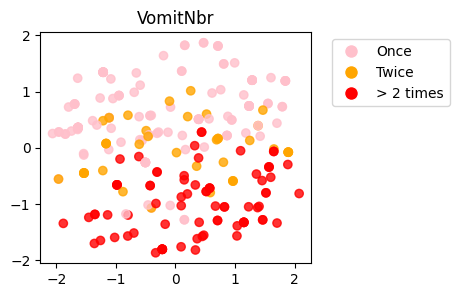

In [ ]:
# VomitNbrのplot
plt.figure(figsize=(3.5, 3))
dat['VomitNbr'] = dat['VomitNbr'].fillna(0)
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
              c=dat['VomitNbr'], cmap=CMAP3, alpha=0.8)
    # 凡例を手動で設定
legend_labels = ['Once', 'Twice', '> 2 times']
colors = ['pink', 'orange', 'red']  # 各カテゴリの色を明示的に指定

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colors]
plt.legend(handles=handles,
                labels=legend_labels,
               # title="LocLen",
                bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('VomitNbr')
plt.show()

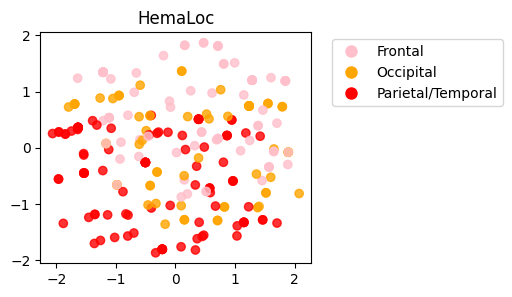

In [ ]:
# HemaLocのplot
plt.figure(figsize=(3.5, 3))
dat['HemaLoc'] = dat['HemaLoc'].fillna(0)
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
              c=dat['HemaLoc'], cmap=CMAP3, alpha=0.8)
    # 凡例を手動で設定
legend_labels = ['Frontal', 'Occipital', 'Parietal/Temporal']
colors = ['pink', 'orange', 'red']  # 各カテゴリの色を明示的に指定

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in colors]
plt.legend(handles=handles,
                labels=legend_labels,
               # title="LocLen",
                bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('HemaLoc')
plt.show()

In [ ]:
 import scipy.stats as stats

# グループごとにデータを分割
group1 = df3['GCSTotal'][df3['cluster'] == 0]
group2 = df3['GCSTotal'][df3['cluster'] == 1]

# t検定の実行
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')


T-statistic: 1.0694369363718785
P-value: 0.2859042987044324


In [ ]:
group1 = df3['AgeInMonth'][df3['cluster'] == 0]
group2 = df3['AgeInMonth'][df3['cluster'] == 1]

# t検定の実行
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: 1.398474624233528
P-value: 0.16320983525753024


In [ ]:
Surgery = df[(Dat['LOCSeparate']==1)&(Dat['Vomit']==1)&(Dat['Hema']==1)]['Neurosurgery']
CT = df[(Dat['LOCSeparate']==1)&(Dat['Vomit']==1)&(Dat['Hema']==1)]['PosCT'].replace({92: np.nan})

In [ ]:
df4 = df3.copy()
df4['Surgery'] = Surgery.values
df4['CT'] = CT.values
df4['Cluster'] = clusters
df4.head()

,High_impact_InjSev,LOCSeparate,LocLen,Vomit,VomitNbr,ActNorm,AMS,SFxBas,SFxPalp,Hema,HemaLoc,cluster,GCSTotal,AgeInMonth,AgeinYears,Surgery,CT,Cluster
0,1.0,1.0,1.0,True,0.0,False,True,False,0.0,True,2.0,1,15,197,16,0.0,0.0,1
1,0.0,1.0,2.0,True,2.0,False,True,False,0.0,True,1.0,1,15,64,5,0.0,0.0,1
2,2.0,1.0,2.0,True,0.0,False,True,True,2.0,True,2.0,1,3,170,14,0.0,1.0,1
3,0.0,1.0,1.0,True,2.0,False,True,False,0.0,True,2.0,0,15,13,1,0.0,0.0,0
4,1.0,1.0,1.0,True,0.0,True,False,False,0.0,True,0.0,0,13,14,1,0.0,1.0,0


In [ ]:
import pandas as pd
from scipy.stats import fisher_exact

# Crosstableの作成
crosstable = pd.crosstab(df4['Surgery'], df4['Cluster'])
print(crosstable)

# Fisher検定の実行
oddsratio, p_value = fisher_exact(crosstable)

print(f'Odds Ratio: {oddsratio}')
print(f'P-value: {p_value}')


Cluster    0    1
Surgery          
0.0      125  116
1.0        3    8
Odds Ratio: 2.8735632183908044
P-value: 0.1319831372610563


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crosstableの作成
crosstable = pd.crosstab(df4['cluster'], df4['CT'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

CT       0.0  1.0
cluster          
0         95   17
1         66   53
Chi-square statistic: 22.17780930306905
P-value: 2.4852978259314565e-06
Degrees of freedom: 1
Expected frequencies:
[[78.06060606 33.93939394]
 [82.93939394 36.06060606]]


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crosstableの作成
crosstable = pd.crosstab(df3['cluster'], df3['High_impact_InjSev'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')


High_impact_InjSev  0.0  1.0  2.0
cluster                          
0                    33   71   24
1                    16   86   22
Chi-square statistic: 7.356398124905083
P-value: 0.02526844076602893
Degrees of freedom: 2
Expected frequencies:
[[24.88888889 79.74603175 23.36507937]
 [24.11111111 77.25396825 22.63492063]]


In [ ]:
# Crosstableの作成
crosstable = pd.crosstab(df3['cluster'], df3['LocLen'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

LocLen   0.0  1.0  2.0  3.0
cluster                    
0         19   96   10    3
1          9    8   91   16
Chi-square statistic: 151.8628701011467
P-value: 1.0444668802530939e-32
Degrees of freedom: 3
Expected frequencies:
[[14.22222222 52.82539683 51.3015873   9.65079365]
 [13.77777778 51.17460317 49.6984127   9.34920635]]


In [ ]:
# # Crosstableの作成
# crosstable = pd.crosstab(df3['cluster'], df3['HA_verb'])
# print(crosstable)

# # カイ二乗検定の実行
# chi2, p_value, dof, expected = chi2_contingency(crosstable)

# print(f'Chi-square statistic: {chi2}')
# print(f'P-value: {p_value}')
# print(f'Degrees of freedom: {dof}')
# print(f'Expected frequencies:\n{expected}')

In [ ]:
# # Crosstableの作成
# crosstable = pd.crosstab(df3['cluster'], df3['HASeverity'])
# print(crosstable)

# # カイ二乗検定の実行
# chi2, p_value, dof, expected = chi2_contingency(crosstable)

# print(f'Chi-square statistic: {chi2}')
# print(f'P-value: {p_value}')
# print(f'Degrees of freedom: {dof}')
# print(f'Expected frequencies:\n{expected}')

In [ ]:
# Crosstableの作成
crosstable = pd.crosstab(df3['cluster'], df3['VomitNbr'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

VomitNbr  0.0  1.0  2.0
cluster                
0          44   27   57
1          73   24   27
Chi-square statistic: 18.01983857283609
P-value: 0.00012219171815228244
Degrees of freedom: 2
Expected frequencies:
[[59.42857143 25.9047619  42.66666667]
 [57.57142857 25.0952381  41.33333333]]


In [ ]:
# Crosstableの作成
crosstable = pd.crosstab(df3['cluster'], df3['ActNorm'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

ActNorm  False  True 
cluster              
0           34     94
1          111     13
Chi-square statistic: 99.60917160032434
P-value: 1.8564274883775453e-23
Degrees of freedom: 1
Expected frequencies:
[[73.65079365 54.34920635]
 [71.34920635 52.65079365]]


In [ ]:
# Crosstableの作成
crosstable = pd.crosstab(df3['cluster'], df3['AMS'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

AMS      False  True 
cluster              
0           95     33
1           20    104
Chi-square statistic: 83.34132066369098
P-value: 6.904127107416391e-20
Degrees of freedom: 1
Expected frequencies:
[[58.41269841 69.58730159]
 [56.58730159 67.41269841]]


In [ ]:
# Crosstableの作成
crosstable = pd.crosstab(df3['cluster'], df3['SFxBas'])
print(crosstable)

# Fisher検定の実行
oddsratio, p_value = fisher_exact(crosstable)

print(f'Odds Ratio: {oddsratio}')
print(f'P-value: {p_value}')

SFxBas   False  True 
cluster              
0          127      1
1          111     13
Odds Ratio: 14.873873873873874
P-value: 0.0006164287033874925


In [ ]:
# Pythonでは3×2のFisherできないのでカイ二乗で検定

# Crosstableの作成
crosstable = pd.crosstab(df3['cluster'], df3['SFxPalp'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

SFxPalp  0.0  1.0  2.0
cluster               
0        123    1    4
1         98    9   17
Chi-square statistic: 17.216519030068604
P-value: 0.00018259143165387588
Degrees of freedom: 2
Expected frequencies:
[[112.25396825   5.07936508  10.66666667]
 [108.74603175   4.92063492  10.33333333]]


In [ ]:
# Crosstableの作成
crosstable = pd.crosstab(df3['cluster'], df3['HemaLoc'])
print(crosstable)

# カイ二乗検定の実行
chi2, p_value, dof, expected = chi2_contingency(crosstable)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

HemaLoc  0.0  1.0  2.0
cluster               
0         40   36   52
1         35   33   56
Chi-square statistic: 0.548562412342215
P-value: 0.760118295248766
Degrees of freedom: 2
Expected frequencies:
[[38.0952381  35.04761905 54.85714286]
 [36.9047619  33.95238095 53.14285714]]
